In [3]:
import numpy as np
import networkx as nx
from NetworkInference import NetworkInference
import time

NI = NetworkInference()
G = nx.erdos_renyi_graph(200,0.05)
A = nx.to_numpy_array(G)

NI.set_NetworkAdjacency(A)
NI.set_T(500)
NI.set_Rho(0.95)
NI.Gen_Stochastic_Gaussian(Epsilon=1)
Data = NI.return_XY()
NI.set_Num_Shuffles_oCSE(200)
NI.set_Forward_oCSE_alpha(0.005)
NI.set_Backward_oCSE_alpha(0.005)
#For parallelization
#NOTE We can parallelize shuffles, but it does not appear to give performance gains yet...
#NI.set_parallel_shuffles(True)
NI.set_parallel_nodes(True)
NI.set_num_processes(18)

t = time.time()
B = NI.Estimate_Network()
fit_time = time.time()-t
print(fit_time)
print(NI.Compute_TPR_FPR())

Estimating in parallel with  18  processes.


[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=18)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=18)]: Done   3 tasks      | elapsed:    2.1s
[Parallel(n_jobs=18)]: Done   4 tasks      | elapsed:    2.6s
[Parallel(n_jobs=18)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=18)]: Done   6 tasks      | elapsed:    2.7s
[Parallel(n_jobs=18)]: Done   7 tasks      | elapsed:    2.8s
[Parallel(n_jobs=18)]: Done   8 tasks      | elapsed:    2.9s
[Parallel(n_jobs=18)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=18)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=18)]: Done  11 tasks      | elapsed:    3.0s
[Parallel(n_jobs=18)]: Done  12 tasks      | elapsed:    3.1s
[Parallel(n_jobs=18)]: Done  13 tasks      | elapsed:    3.1s
[Parallel(n_jobs=18)]: Done  14 tasks      | elapsed:    3.2s
[Parallel(n_jobs=18)]: Done  15 tasks      | elapsed:  

22.710873126983643
(0.8108374384236453, 0.0048186391315859145)


[Parallel(n_jobs=18)]: Done 200 out of 200 | elapsed:   22.7s finished


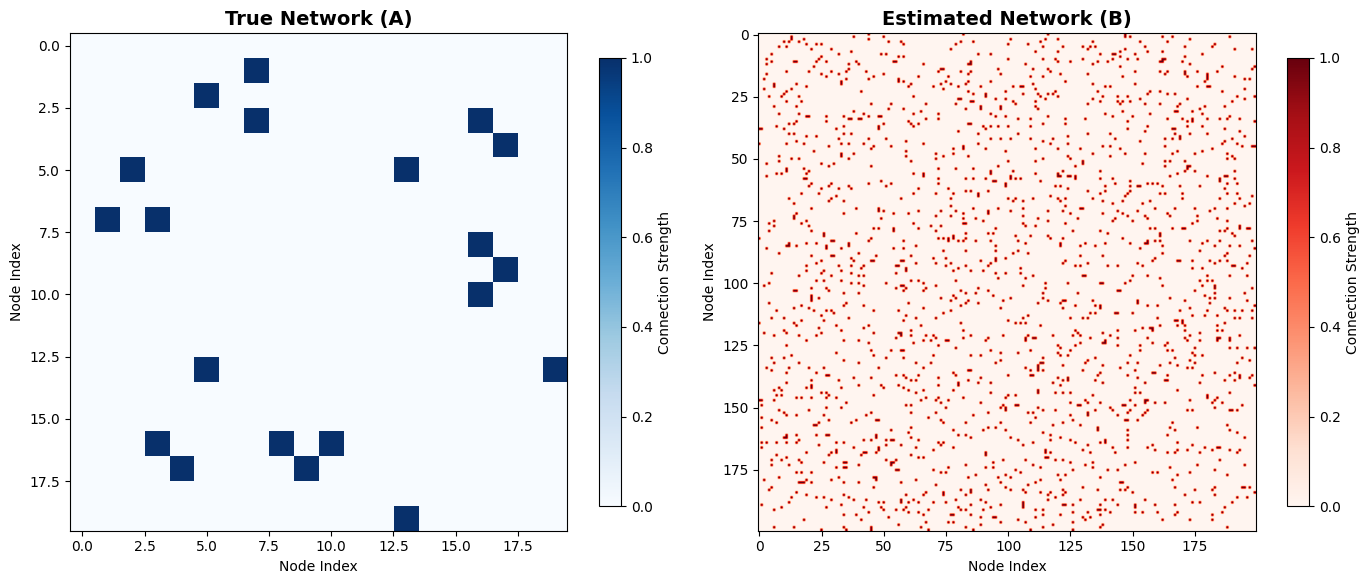

In [8]:

import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the true adjacency matrix A
im1 = ax1.imshow(A, cmap='Blues', vmin=0, vmax=1)
ax1.set_title('True Network (A)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Node Index')
ax1.set_ylabel('Node Index')

# Plot the estimated adjacency matrix B
im2 = ax2.imshow(B, cmap='Reds', vmin=0, vmax=1)
ax2.set_title('Estimated Network (B)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Node Index')
ax2.set_ylabel('Node Index')

# Add colorbars
plt.colorbar(im1, ax=ax1, shrink=0.8, label='Connection Strength')
plt.colorbar(im2, ax=ax2, shrink=0.8, label='Connection Strength')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
import numpy as np
import networkx as nx
from NetworkInference import NetworkInference
import time

NI = NetworkInference()
G = nx.erdos_renyi_graph(20,0.05)
A = nx.to_numpy_array(G)
NI.set_NetworkAdjacency(A)
NI.set_T(1000)
NI.set_Rho(0.95)
NI.Gen_Stochastic_Gaussian(Epsilon=1)
Data = NI.return_XY()
#Return based on a network of known edges
NI.set_conditional_returns_set('existing_edges')
D = NI.conditional_returns()

#Return based on conditioning on everything but the pair that you are testing.
NI.set_conditional_returns_set('all_but_one')
D2 = NI.conditional_returns()

Estimating conditionals for edges in node number:  0
Estimating conditionals for edges in node number:  1
Estimating conditionals for edges in node number:  2
Estimating conditionals for edges in node number:  3
Estimating conditionals for edges in node number:  4
Estimating conditionals for edges in node number:  5
Estimating conditionals for edges in node number:  6
Estimating conditionals for edges in node number:  7
Estimating conditionals for edges in node number:  8
Estimating conditionals for edges in node number:  9
Estimating conditionals for edges in node number:  10
Estimating conditionals for edges in node number:  11
Estimating conditionals for edges in node number:  12
Estimating conditionals for edges in node number:  13
Estimating conditionals for edges in node number:  14
Estimating conditionals for edges in node number:  15
Estimating conditionals for edges in node number:  16
Estimating conditionals for edges in node number:  17
Estimating conditionals for edges in n